<div style="text-align: center; font-weight: bold; font-size: 22px; color: #1a1a1a;">
  <div style="color: #0B5394; font-size: 38px;">MEDIACREST TRAINING COLLEGE</div>
  <div style="color: #38761D; font-size: 24px;">DAY DATA ANALYSIS AND FUNDAMENTAL OF ARTIFICIAL INTELLIGENCE-DATA CLEANING AND PREPROCESSING</div>
  <br>
  <div style="color: #38761D; font-size: 24px;">DATA CLEANING AND PREPROCESSING</div>
  <br>
  <div style="color: #CC0000; font-size: 22px;">FACILITATOR:</div>
  <div style="color: #000000; font-size: 20px;">VICTOR WANDERA LUMUMBA</div>

  <div style="color: #6AA84F; font-size: 18px;">Date:</div>
  <div style="color: #351C75; font-size: 18px;">Feb 01, 2026 - Feb 03, 2026</div>
</div>

## **Data Cleaning and Processing**
Data cleaning and preprocessing transform raw, imperfect data into a reliable foundation for analysis. Real-world datasets—like telecommunications records—typically contain missing values, inconsistent categories (e.g., "Male"/"M"/"m"), outliers (e.g., age = -5 or 127), duplicates, and data type errors. These issues distort visualizations and models if unaddressed. The cleaning workflow begins with diagnosis using `df.info()` and `df.isnull().sum()`, followed by strategic handling: imputing missing values based on patterns (e.g., median for numeric, mode for categorical), standardizing categories, investigating outliers using the IQR method before capping or removing, and resolving duplicates—especially on unique identifiers like Customer_ID. Critically, every action must be documented in a cleaning log to ensure reproducibility and auditability, as missingness patterns often carry business meaning (e.g., low-income customers skipping optional survey questions).

Effective cleaning balances statistical rigor with domain knowledge. Never delete outliers or missing values blindly—first investigate whether extremes reflect data entry errors or legitimate edge cases (e.g., a $485 monthly charge for an enterprise plan). Always preserve the original dataset and work on a copy (`df_clean = df.copy()`). In Kenyan contexts, missing data frequently correlates with socioeconomic factors, requiring thoughtful imputation rather than deletion to avoid bias. This disciplined approach ensures that subsequent visualizations in Python and Power BI accurately reflect business reality, turning raw data into trustworthy insights for decision-making. Clean data isn't optional—it's the non-negotiable foundation of credible analytics.


### **Load the Required Libraries**

In [ ]:
### Step 1: Import the Required Libraries and Functionalities
from google.colab import files
import pandas as pd
import numpy as np

### **Load the Needed Data set**

In [ ]:
### Step 2: Import the File from the Local Directory/Storage
uploaded = files.upload()

Saving telecom_customer_data.csv to telecom_customer_data.csv


In [ ]:
### Step 3: Read the File as Data Frame
df = pd.read_csv('telecom_customer_data.csv')
df.head(20)

,Customer_ID,Age,Gender,Tenure_Months,Contract_Type,Payment_Method,Internet_Service,Monthly_Charges,Total_Charges,Monthly_Data_Usage_GB,Call_Duration_Minutes,Customer_Service_Calls,Service_Outages_Last_Month,Satisfaction_Score,Churn_Status
0,e4fbb2f7,48.0,Male,13,Month-to-month,Electronic check,Fiber optic,116.62,1539.70,482.8,849,1,0,8.3,No
1,36ab549d,NaN,Female,37,One year,Electronic check,DSL,60.90,NaN,194.0,924,1,0,10.0,Yes
2,a1c8d6e1,50.0,Male,16,Month-to-month,Electronic check,DSL,62.87,996.37,178.3,527,1,1,5.6,Yes
3,e5859bd3,60.0,Male,37,Month-to-month,Credit card,No,54.39,2019.80,45.9,284,1,0,6.1,No
4,93d63458,NaN,Male,12,Two year,Bank transfer,DSL,56.65,713.54,166.7,474,2,0,8.5,No
5,00d09199,39.0,Female,12,One year,Credit card,DSL,58.05,NaN,230.4,1395,2,0,7.2,No
6,adc1bf79,61.0,Female,12,Month-to-month,Electronic check,Fiber optic,76.42,900.11,285.1,382,1,0,7.3,No
7,06df3d3d,51.0,Male,20,Two year,Bank transfer,No,29.80,626.42,24.7,363,2,2,NaN,No
8,97ecea0e,36.0,Male,39,Two year,Mailed check,DSL,72.57,2865.52,2309.8,180,1,0,9.2,No
9,ec7cb35d,49.0,Female,13,Two year,Credit card,Fiber optic,50.19,632.29,341.2,125,3,1,3.0,Yes


## **Check the Structure and Type of Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1508 non-null   object 
 1   Age                         1403 non-null   float64
 2   Gender                      1508 non-null   object 
 3   Tenure_Months               1508 non-null   int64  
 4   Contract_Type               1506 non-null   object 
 5   Payment_Method              1508 non-null   object 
 6   Internet_Service            1448 non-null   object 
 7   Monthly_Charges             1433 non-null   float64
 8   Total_Charges               1463 non-null   float64
 9   Monthly_Data_Usage_GB       1508 non-null   float64
 10  Call_Duration_Minutes       1508 non-null   int64  
 11  Customer_Service_Calls      1508 non-null   int64  
 12  Service_Outages_Last_Month  1508 non-null   int64  
 13  Satisfaction_Score          1328 

### **Convert all Object Variables to Factors/Categories**

In [ ]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('category')

print("Object columns converted to categorical type:")
print(df.select_dtypes(include='category').columns)

Object columns converted to categorical type:
Index(['Customer_ID', 'Gender', 'Contract_Type', 'Payment_Method',
       'Internet_Service', 'Churn_Status'],
      dtype='object')


### **Confirm the Data Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Customer_ID                 1508 non-null   category
 1   Age                         1403 non-null   float64 
 2   Gender                      1508 non-null   category
 3   Tenure_Months               1508 non-null   int64   
 4   Contract_Type               1506 non-null   category
 5   Payment_Method              1508 non-null   category
 6   Internet_Service            1448 non-null   category
 7   Monthly_Charges             1433 non-null   float64 
 8   Total_Charges               1463 non-null   float64 
 9   Monthly_Data_Usage_GB       1508 non-null   float64 
 10  Call_Duration_Minutes       1508 non-null   int64   
 11  Customer_Service_Calls      1508 non-null   int64   
 12  Service_Outages_Last_Month  1508 non-null   int64   
 13  Satisfaction_Score

### **Check for the Presence of Duplicate Row**

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
duplicate_rows

Number of duplicate rows: 0


np.int64(0)

### **Check for the Presence of Missing Values for Each Variable**

In [ ]:
missing_values = df.isnull().sum()
print("Number of missing values for each variable:")
missing_values

Number of missing values for each variable:


,0
Customer_ID,0
Age,105
Gender,0
Tenure_Months,0
Contract_Type,2
Payment_Method,0
Internet_Service,60
Monthly_Charges,75
Total_Charges,45
Monthly_Data_Usage_GB,0


### **Impute the Missing Observations with Mean (Mean Imputation) for Numeric Variables**

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

print("Missing values after mean imputation:")
print(df.isnull().sum())

Missing values after mean imputation:
Customer_ID                    0
Age                            0
Gender                         0
Tenure_Months                  0
Contract_Type                  2
Payment_Method                 0
Internet_Service              60
Monthly_Charges                0
Total_Charges                  0
Monthly_Data_Usage_GB          0
Call_Duration_Minutes          0
Customer_Service_Calls         0
Service_Outages_Last_Month     0
Satisfaction_Score             0
Churn_Status                   0
dtype: int64


/tmp/ipython-input-3937736438.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


### **Impute the Missing Observations with Mode  (Mode Imputation) Value for Categorical Variables**

In [ ]:
categorical_cols = df.select_dtypes(include='category').columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]  # .mode() can return multiple modes, take the first
        df[col].fillna(mode_value, inplace=True)

print("Missing values after mode imputation:")
print(df.isnull().sum())

Missing values after mode imputation:
Customer_ID                   0
Age                           0
Gender                        0
Tenure_Months                 0
Contract_Type                 0
Payment_Method                0
Internet_Service              0
Monthly_Charges               0
Total_Charges                 0
Monthly_Data_Usage_GB         0
Call_Duration_Minutes         0
Customer_Service_Calls        0
Service_Outages_Last_Month    0
Satisfaction_Score            0
Churn_Status                  0
dtype: int64


/tmp/ipython-input-3506010229.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Customer_ID                 1508 non-null   category
 1   Age                         1508 non-null   float64 
 2   Gender                      1508 non-null   category
 3   Tenure_Months               1508 non-null   int64   
 4   Contract_Type               1508 non-null   category
 5   Payment_Method              1508 non-null   category
 6   Internet_Service            1508 non-null   category
 7   Monthly_Charges             1508 non-null   float64 
 8   Total_Charges               1508 non-null   float64 
 9   Monthly_Data_Usage_GB       1508 non-null   float64 
 10  Call_Duration_Minutes       1508 non-null   int64   
 11  Customer_Service_Calls      1508 non-null   int64   
 12  Service_Outages_Last_Month  1508 non-null   int64   
 13  Satisfaction_Score

## **Check the Entire Dataset for the Presence of Missing Values**

In [ ]:
missing_values = df.isnull().sum()
print("Number of missing values for each variable:")
missing_values

Number of missing values for each variable:


,0
Customer_ID,0
Age,0
Gender,0
Tenure_Months,0
Contract_Type,0
Payment_Method,0
Internet_Service,0
Monthly_Charges,0
Total_Charges,0
Monthly_Data_Usage_GB,0


## **Check the Presence of Outliers**

In [ ]:
print("Outlier detection using IQR method:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")

Outlier detection using IQR method:
Column 'Age': 78 outliers
Column 'Tenure_Months': 38 outliers
Column 'Monthly_Charges': 46 outliers
Column 'Total_Charges': 76 outliers
Column 'Monthly_Data_Usage_GB': 62 outliers
Column 'Call_Duration_Minutes': 52 outliers
Column 'Customer_Service_Calls': 62 outliers
Column 'Service_Outages_Last_Month': 58 outliers
Column 'Satisfaction_Score': 17 outliers


### **Handling Outliers using 1.5*IQR**

In [ ]:
import numpy as np

# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Cap outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing rows
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers have been handled (capped) using the IQR method.")

# Step 3: Verify outliers after capping
print("\nOutlier detection using IQR method after capping:")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")

Outliers have been handled (capped) using the IQR method.

Outlier detection using IQR method after capping:
Column 'Age': 0 outliers
Column 'Tenure_Months': 0 outliers
Column 'Monthly_Charges': 0 outliers
Column 'Total_Charges': 0 outliers
Column 'Monthly_Data_Usage_GB': 0 outliers
Column 'Call_Duration_Minutes': 0 outliers
Column 'Customer_Service_Calls': 0 outliers
Column 'Service_Outages_Last_Month': 0 outliers
Column 'Satisfaction_Score': 0 outliers


## **Features Normalization and Standardization**
Normalization and standardization are scaling techniques that adjust feature ranges to ensure fair comparison during analysis. **Normalization** (min-max scaling) rescales values to a fixed range, typically [0, 1], using the formula *(x – min) / (max – min)*—ideal when data has bounded ranges or algorithms require bounded inputs (e.g., neural networks). **Standardization** (z-score scaling) transforms values to have zero mean and unit variance using *(x – mean) / std*—preferred when data contains outliers (since it's less sensitive to extremes) or for algorithms assuming normal distributions (e.g., logistic regression, SVMs). For the telecom dataset, standardize skewed variables like `Monthly_Charges` or `Monthly_Data_Usage_GB` before modeling; normalize only when bounded outputs are required. Always fit scalers on training data only, then apply to test data to prevent data leakage.

### **What to Considert Before Normalization and Standardization**
Before applying normalization or standardization, first determine whether scaling is actually needed—tree-based models (Random Forests, XGBoost) and frequency-based analyses don't require it, while distance-based algorithms (KNN, SVMs) and gradient descent optimizers (neural networks) do. Crucially, **never scale before train-test splitting**: always fit your scaler (e.g., `StandardScaler`) on training data only, then transform both train and test sets to prevent data leakage. Assess outlier sensitivity—standardization preserves outliers (using mean/std), while normalization compresses them into [0,1] but gets distorted by extremes; for skewed telecom features like `Monthly_Data_Usage_GB`, consider log-transforming first. Exclude categorical variables (e.g., `Contract_Type`) and binary flags from scaling. Finally, weigh interpretability: scaled features lose business meaning (e.g., "z-score of 1.2" vs. "$85 monthly charge"), so retain raw values for stakeholder dashboards even when using scaled versions for modeling. Always document scaling decisions in your cleaning log.

### **Standardize Monthly Charges and Monthly Data Usage**

In [ ]:
## pip install scikit-learn
## pip install pandas
## pip install numpy
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to standardize
columns_to_standardize = ['Monthly_Charges', 'Monthly_Data_Usage_GB']

# Apply StandardScaler to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print("Columns 'Monthly_Charges' and 'Monthly_Data_Usage_GB' have been standardized.")
print(df[columns_to_standardize].head())

Columns 'Monthly_Charges' and 'Monthly_Data_Usage_GB' have been standardized.
   Monthly_Charges  Monthly_Data_Usage_GB
0         1.805523               2.341071
1        -0.604710               0.216949
2        -0.519496               0.101476
3        -0.886308              -0.872325
4        -0.788549               0.016158


### **View the Data and Observe the Standardized Variables**

In [ ]:
df.head()

,Customer_ID,Age,Gender,Tenure_Months,Contract_Type,Payment_Method,Internet_Service,Monthly_Charges,Total_Charges,Monthly_Data_Usage_GB,Call_Duration_Minutes,Customer_Service_Calls,Service_Outages_Last_Month,Satisfaction_Score,Churn_Status
0,e4fbb2f7,48.000000,Male,13.0,Month-to-month,Electronic check,Fiber optic,1.805523,1539.700000,2.341071,849.0,1.0,0.0,8.3,No
1,36ab549d,44.180328,Female,37.0,One year,Electronic check,DSL,-0.604710,2139.004566,0.216949,924.0,1.0,0.0,10.0,Yes
2,a1c8d6e1,50.000000,Male,16.0,Month-to-month,Electronic check,DSL,-0.519496,996.370000,0.101476,527.0,1.0,1.0,5.6,Yes
3,e5859bd3,60.000000,Male,37.0,Month-to-month,Credit card,No,-0.886308,2019.800000,-0.872325,284.0,1.0,0.0,6.1,No
4,93d63458,44.180328,Male,12.0,Two year,Bank transfer,DSL,-0.788549,713.540000,0.016158,474.0,2.0,0.0,8.5,No


### **Features Engineering**
Feature engineering is the process of creating new, more informative variables from existing data to improve analytical insights and model performance—transforming raw columns into meaningful predictors that better capture underlying patterns. Rather than relying solely on original variables, analysts derive features like *Risk_Score* (combining attendance, study hours, and prior grades), *Performance_Gap* (difference between expected and actual scores), or interaction terms (e.g., *Income × Education_Level*) that reveal hidden relationships. In telecom data, this might mean calculating *Revenue_per_GB* (Monthly_Charges ÷ Data_Usage) to identify inefficient pricing tiers or flagging customers with high service calls *and* low satisfaction as churn risks. Effective feature engineering requires domain knowledge to ask "What combination of variables would best explain the outcome?"—it's not automatic transformation but thoughtful creation of variables that align with business logic. Crucially, engineered features should be created *after* cleaning but *before* scaling, and always derived from training data alone to prevent data leakage during modeling.


In [ ]:
# 1. Data_to_Call_Ratio: Ratio of monthly data usage to call duration
# Handle potential division by zero for Call_Duration_Minutes
df['Data_to_Call_Ratio'] = np.where(
    df['Call_Duration_Minutes'] != 0,
    df['Monthly_Data_Usage_GB'] / df['Call_Duration_Minutes'],
    0  # Assign 0 or another suitable value if Call_Duration_Minutes is 0
)

# 2. Service_Interaction_Score: Combined metric of customer service calls and service outages
df['Service_Interaction_Score'] = df['Customer_Service_Calls'] + df['Service_Outages_Last_Month']

# 3. Tenure_in_Years: Convert tenure from months to years
df['Tenure_in_Years'] = df['Tenure_Months'] / 12

# 4. Charge_Per_Tenure_Month: Average monthly charge over the customer's tenure
# Handle potential division by zero for Tenure_Months
df['Charge_Per_Tenure_Month'] = np.where(
    df['Tenure_Months'] != 0,
    df['Total_Charges'] / df['Tenure_Months'],
    0 # Assign 0 or another suitable value if Tenure_Months is 0
)

print("New features created:")
df[['Data_to_Call_Ratio', 'Service_Interaction_Score', 'Tenure_in_Years', 'Charge_Per_Tenure_Month']].head()

New features created:


,Data_to_Call_Ratio,Service_Interaction_Score,Tenure_in_Years,Charge_Per_Tenure_Month
0,0.002757,1.0,1.083333,118.438462
1,0.000235,1.0,3.083333,57.810934
2,0.000193,2.0,1.333333,62.273125
3,-0.003072,1.0,3.083333,54.589189
4,0.000034,2.0,1.000000,59.461667


### **View the Data After Features Engineering**

In [ ]:
df.head()

,Customer_ID,Age,Gender,Tenure_Months,Contract_Type,Payment_Method,Internet_Service,Monthly_Charges,Total_Charges,Monthly_Data_Usage_GB,Call_Duration_Minutes,Customer_Service_Calls,Service_Outages_Last_Month,Satisfaction_Score,Churn_Status,Data_to_Call_Ratio,Service_Interaction_Score,Tenure_in_Years,Charge_Per_Tenure_Month
0,e4fbb2f7,48.000000,Male,13.0,Month-to-month,Electronic check,Fiber optic,1.805523,1539.700000,2.341071,849.0,1.0,0.0,8.3,No,0.002757,1.0,1.083333,118.438462
1,36ab549d,44.180328,Female,37.0,One year,Electronic check,DSL,-0.604710,2139.004566,0.216949,924.0,1.0,0.0,10.0,Yes,0.000235,1.0,3.083333,57.810934
2,a1c8d6e1,50.000000,Male,16.0,Month-to-month,Electronic check,DSL,-0.519496,996.370000,0.101476,527.0,1.0,1.0,5.6,Yes,0.000193,2.0,1.333333,62.273125
3,e5859bd3,60.000000,Male,37.0,Month-to-month,Credit card,No,-0.886308,2019.800000,-0.872325,284.0,1.0,0.0,6.1,No,-0.003072,1.0,3.083333,54.589189
4,93d63458,44.180328,Male,12.0,Two year,Bank transfer,DSL,-0.788549,713.540000,0.016158,474.0,2.0,0.0,8.5,No,0.000034,2.0,1.000000,59.461667


# **Data Visualization**
Data visualization is the practice of representing data using charts, graphs, and other visual formats to make information easier to understand. By turning raw numbers into visual patterns, it helps people quickly identify trends, comparisons, relationships, and outliers that might be difficult to see in tables or text.

Effective data visualization supports better decision-making by communicating insights clearly and efficiently. Well-designed visuals reduce cognitive load, tell a clear data story, and allow both technical and non-technical audiences to grasp key messages at a glance.


## **Visualizing Categorical Variables**

### **Bar Chart**

/tmp/ipython-input-2236664902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', palette='viridis')


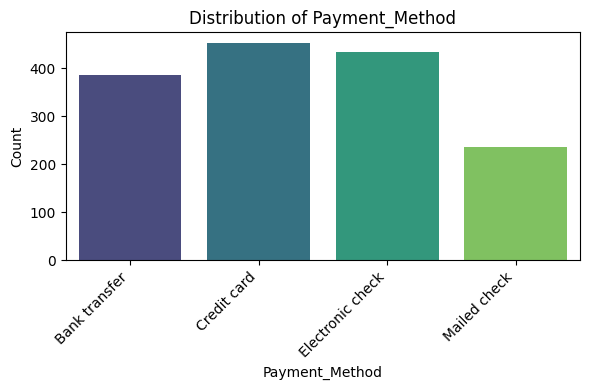

In [ ]:
### Forr Single Variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Payment_Method', palette='viridis')

plt.title('Distribution of Payment_Method')
plt.xlabel('Payment_Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/tmp/ipython-input-451196748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-451196748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-451196748.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


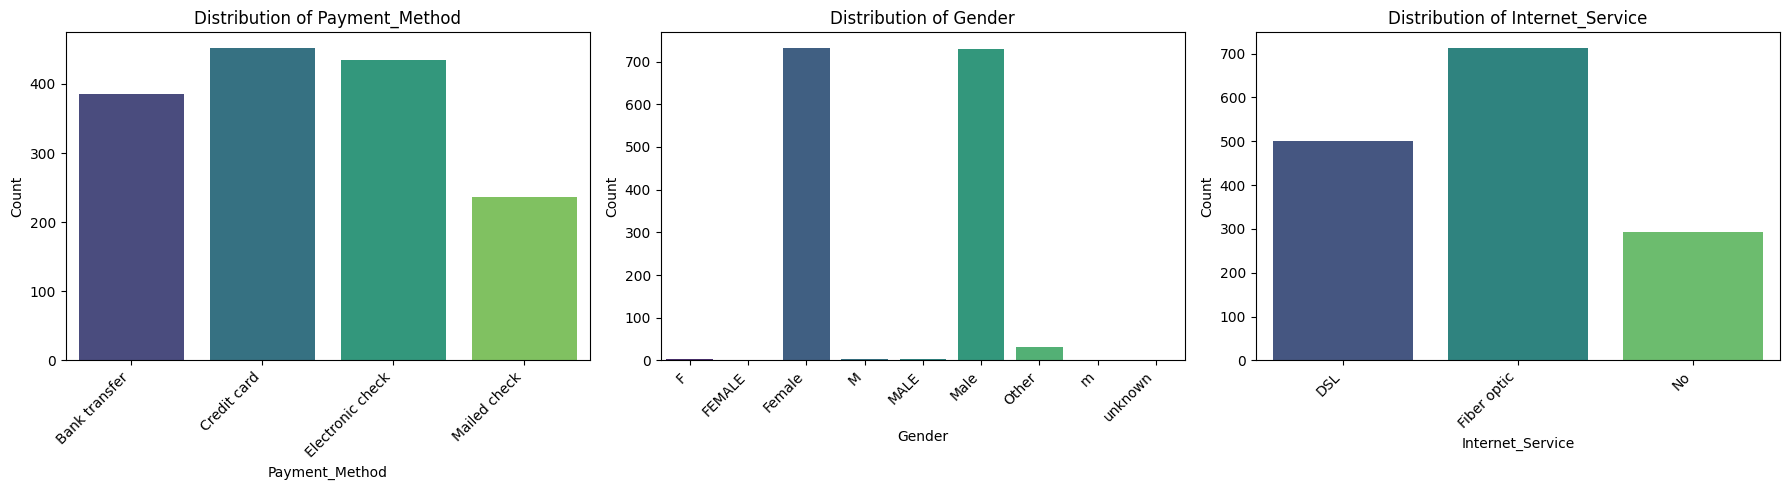

In [ ]:
### Multiple Categorical Variables
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Payment_Method', 'Gender', 'Internet_Service']

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Bar Chart for One Variables with Frequency and Perrcentage at the Top of Each Bar**

/tmp/ipython-input-4009416486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=column_to_plot, palette='viridis')


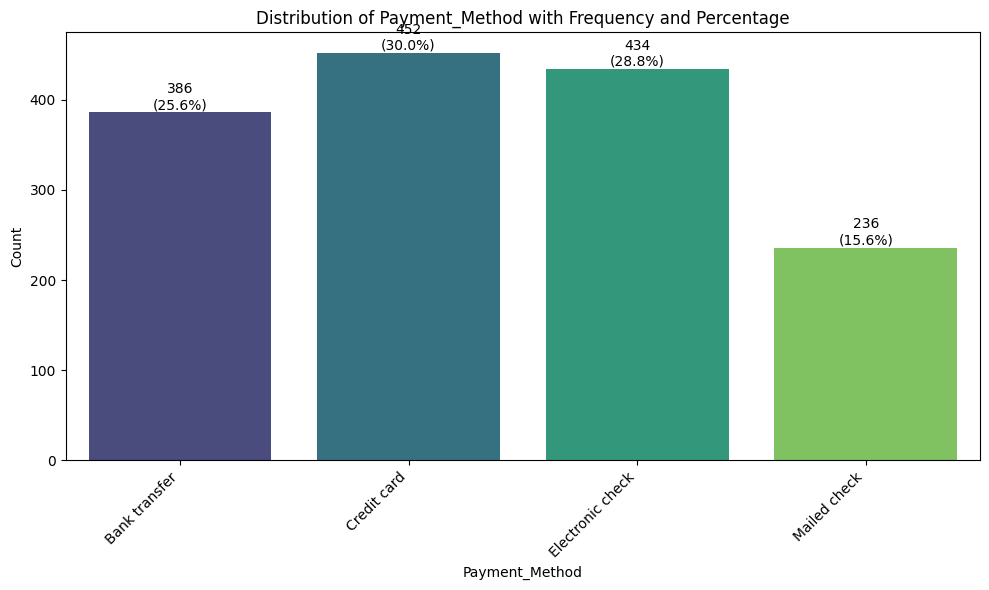

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the categorical column to plot
column_to_plot = 'Payment_Method'

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x=column_to_plot, palette='viridis')

plt.title(f'Distribution of {column_to_plot} with Frequency and Percentage')
plt.xlabel(column_to_plot)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add frequency and percentage on top of each bar
total = len(df[column_to_plot])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

The bar chart illustrates payment method preferences, with **credit card** (30.0%, 452 users) and **electronic check** (28.8%, 434 users) dominating, reflecting a strong shift toward digital transactions. **Bank transfer** (25.6%, 386 users) follows, while **mailed check** (15.6%, 236 users) is the least adopted, signaling declining reliance on manual processes.  

**Business insight**: Prioritize digital payment infrastructure (e.g., seamless credit card/electronic check integration) to align with customer expectations and reduce operational costs tied to mailed checks. Analyze credit card’s popularity to enhance loyalty programs (e.g., cashback incentives).

Additionally, investigation to barriers for mailed check users—targeted education or automated billing could improve adoption of digital methods. Strategic focus on digital channels will boost efficiency, reduce churn, and future-proof payment systems amid evolving consumer behavior.

### **Pie Chart**

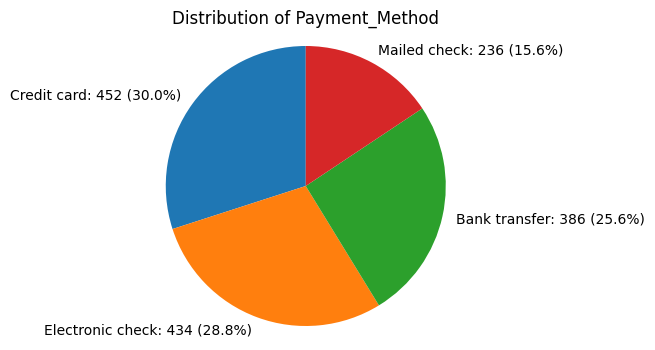

In [ ]:
import matplotlib.pyplot as plt

# Choose the categorical column to plot
column_to_plot = 'Payment_Method'

# Calculate value counts and percentages
counts = df[column_to_plot].value_counts()
percentages = df[column_to_plot].value_counts(normalize=True) * 100

# Create labels with both count and percentage
labels = [f'{idx}: {count} ({perc:.1f}%)' for idx, count, perc in zip(counts.index, counts.values, percentages.values)]

plt.figure(figsize=(6, 4))
plt.pie(counts, labels=labels, autopct='', startangle=90, pctdistance=0.85)
plt.title(f'Distribution of {column_to_plot}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## **Multiple Pie Charts Put Together**

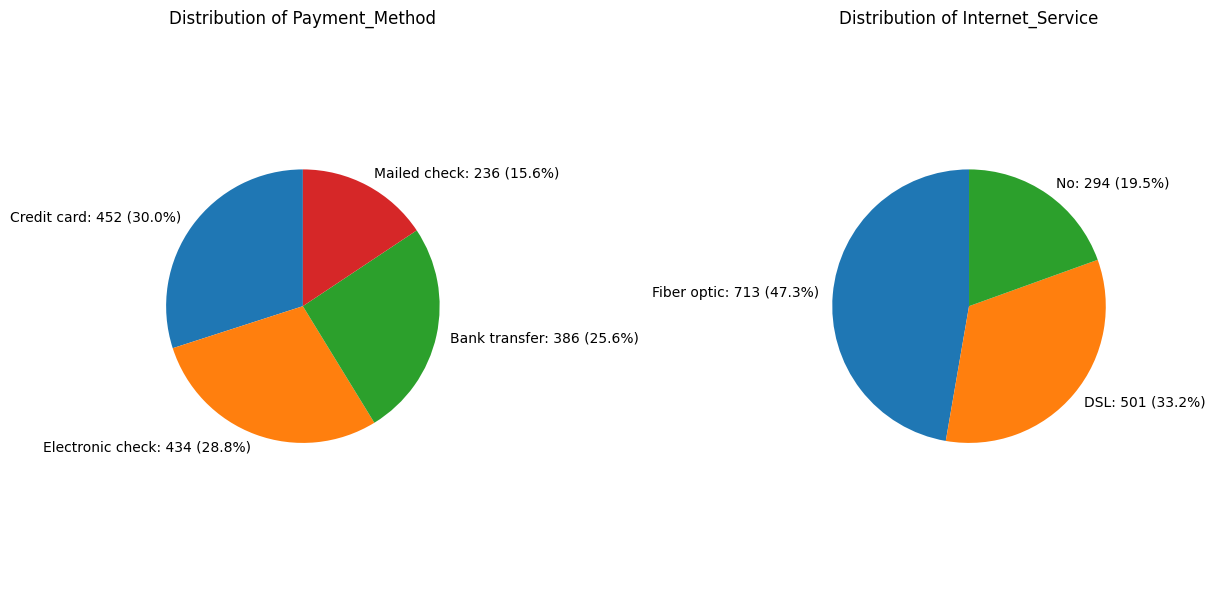

In [ ]:
import matplotlib.pyplot as plt

categorical_columns = ['Payment_Method', 'Internet_Service']

plt.figure(figsize=(12, 6)) # Adjust figure size for two plots

for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)

    # Calculate value counts and percentages
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    # Create labels with both count and percentage
    labels = [f'{idx}: {count} ({perc:.1f}%)' for idx, count, perc in zip(counts.index, counts.values, percentages.values)]

    plt.pie(counts, labels=labels, autopct='', startangle=90, pctdistance=0.85)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

The payment method pie chart shows credit card (30.0%) and electronic check (28.8%) as dominant, with mailed check (15.6%) the least used, indicating a clear shift toward digital transactions. Internet service data reveals fiber optic (47.3%) as the leading choice, followed by DSL (33.2%), while 19.5% of users have no service.  

**Business insight**: Companies should prioritize enhancing digital payment options (e.g., credit card and electronic check integrations) to align with customer preferences and reduce operational inefficiencies from mailed checks. Simultaneously, expanding fiber optic infrastructure addresses high demand for fast internet, while developing affordable entry-level plans for the 19.5% without service can reduce churn and attract new customers. Strategic investments in these areas will improve retention, market penetration, and overall customer satisfaction.

### **Comparative  Bar Graphs**

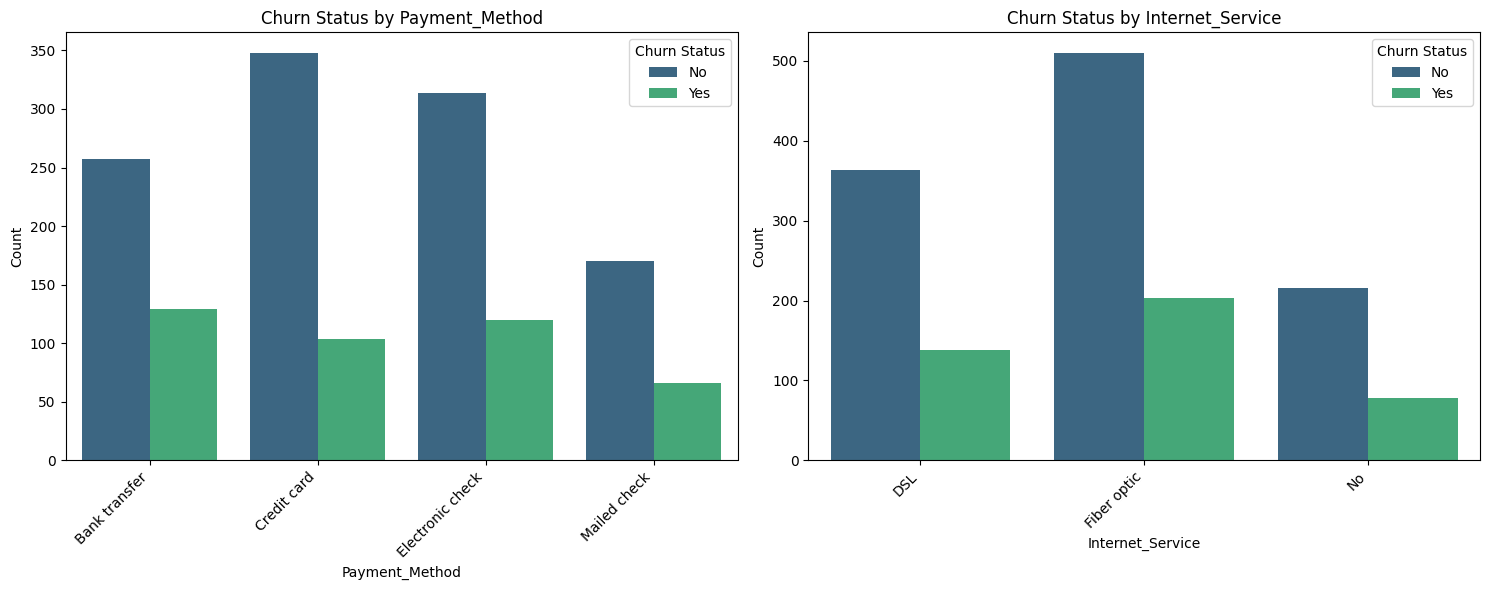

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables to compare against 'Churn_Status'
comparison_variables = ['Payment_Method', 'Internet_Service']

plt.figure(figsize=(15, 6)) # Adjust figure size for multiple plots

for i, col in enumerate(comparison_variables):
    plt.subplot(1, len(comparison_variables), i + 1)
    sns.countplot(data=df, x=col, hue='Churn_Status', palette='viridis')
    plt.title(f'Churn Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

The bar charts reveal payment and internet service preferences influence churn. For payment methods, **credit card** users show the highest retention ("No" churn: ~350), while **mailed check** users have the lowest retention ("Yes" churn: ~60), suggesting friction in manual payment processes. For internet services, **fiber optic** users exhibit strong loyalty ("No" churn: ~500), whereas those with **no internet service** face higher churn ("Yes" churn: ~90), likely due to dissatisfaction with service gaps.  

**Business insight**: Streamlining digital payment options (e.g., credit cards) and prioritizing fiber optic infrastructure could reduce churn. Targeted interventions for mailed check users—like automated billing—may improve retention. Additionally, addressing service gaps for non-internet users could mitigate involuntary churn, enhancing customer satisfaction and revenue stability.

## **Visuals for Continouss Variables**

### **Box Plot**

/tmp/ipython-input-1884115622.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column_to_plot, palette='viridis')


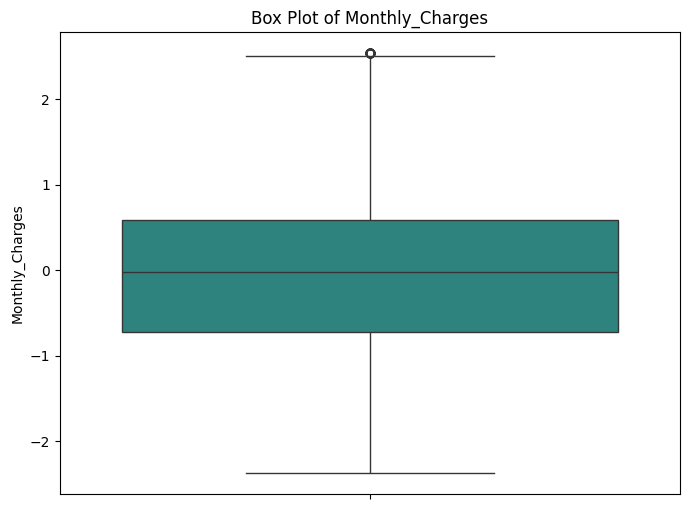

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a continuous column to plot
column_to_plot = 'Monthly_Charges'

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y=column_to_plot, palette='viridis')
plt.title(f'Box Plot of {column_to_plot}')
plt.ylabel(column_to_plot)
plt.show()

### **A Box Plot of Monthly Charges by Payment Method**

/tmp/ipython-input-1523443942.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Payment_Method', y='Monthly_Charges', palette='viridis')


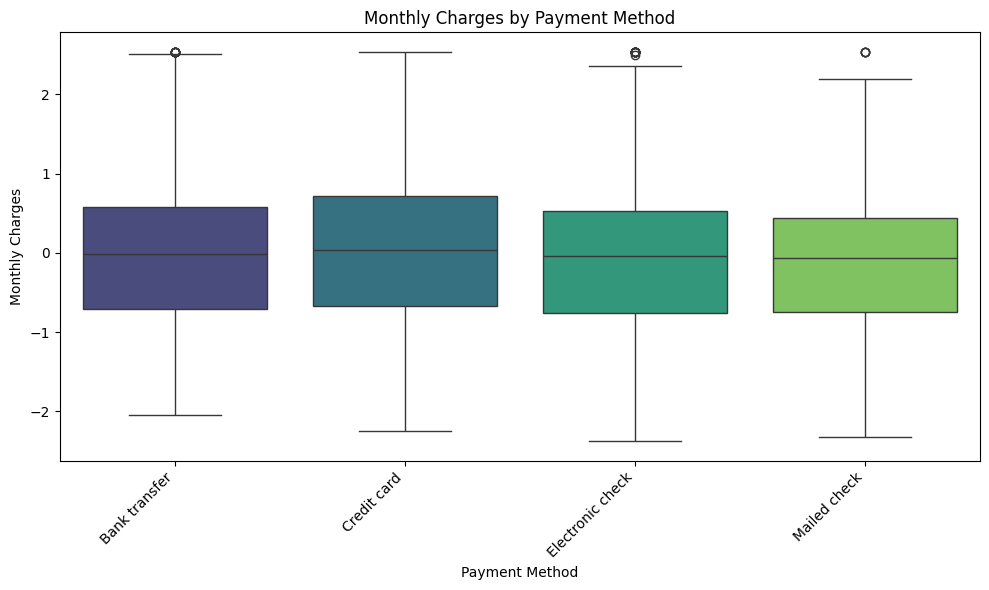

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Payment_Method', y='Monthly_Charges', palette='viridis')
plt.title('Monthly Charges by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Boxplot and SwarmPlots**

In [ ]:
uploaded = files.upload()

Saving GSSsubset.csv to GSSsubset.csv


In [ ]:
df4 = pd.read_csv('GSSsubset.csv')
df4.head(8)

,id,sex,degree,income,marital,age,height,weight,hrswrk
0,1,MALE,BACHELOR,60967.50,DIVORCED,53.0,72.0,190,60
1,2,FEMALE,BACHELOR,60967.50,MARRIED,26.0,60.0,97,40
2,4,FEMALE,BACHELOR,10161.25,MARRIED,56.0,68.0,160,20
3,14,FEMALE,HIGH SCHOOL,17551.25,MARRIED,40.0,65.0,156,37
4,16,MALE,HIGH SCHOOL,17551.25,MARRIED,56.0,66.0,210,6
5,19,MALE,LT HIGH SCHOOL,15703.75,MARRIED,51.0,68.0,170,50
6,21,FEMALE,HIGH SCHOOL,17551.25,DIVORCED,30.0,62.0,115,38
7,27,MALE,HIGH SCHOOL,17551.25,SEPARATED,NaN,70.0,180,40


/tmp/ipython-input-911834478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df4, x='degree', y='income', palette='viridis')


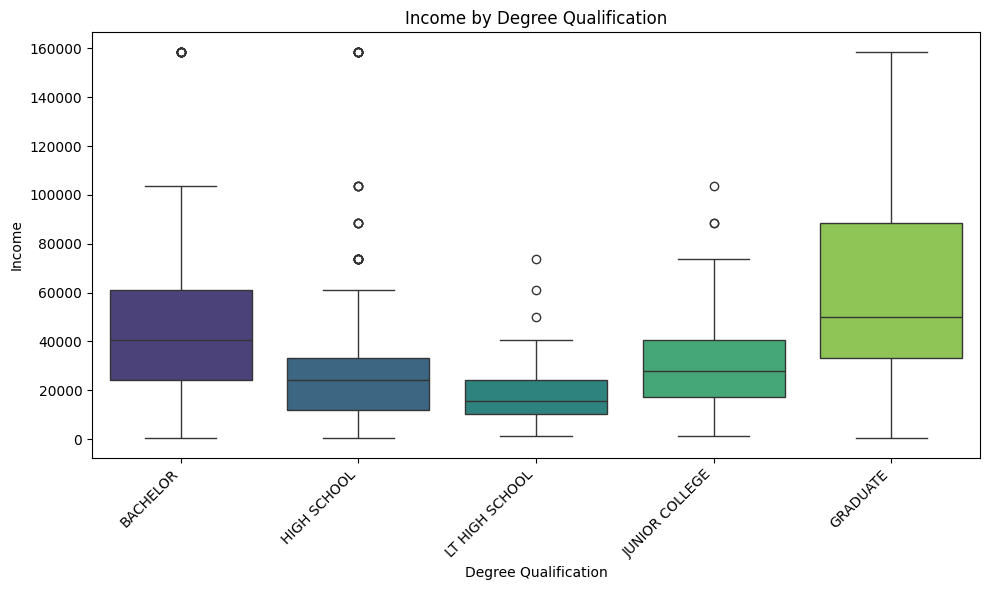

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df4, x='degree', y='income', palette='viridis')
plt.title('Income by Degree Qualification')
plt.xlabel('Degree Qualification')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Boxplot and SwamPlot**

/tmp/ipython-input-1868751101.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df4, x='degree', y='income', palette='viridis', showfliers=False) # showfliers=False hides outliers from boxplot
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


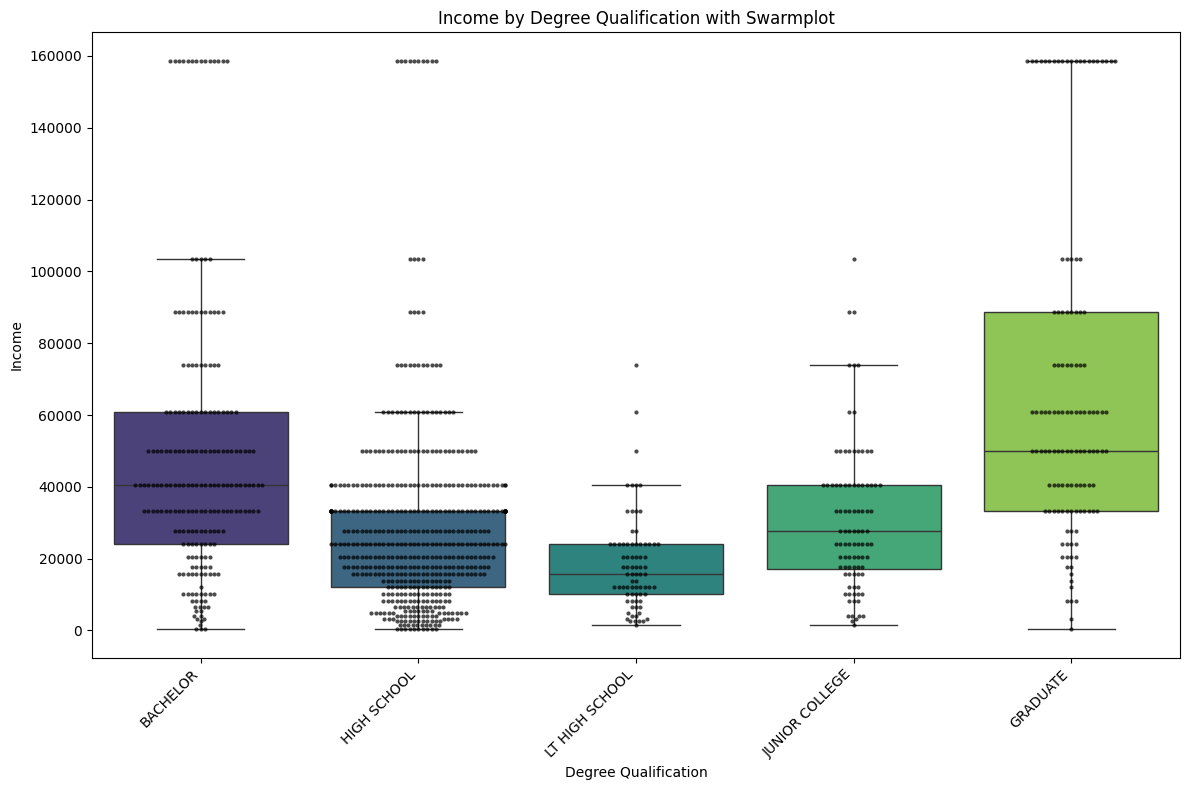

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# Create the boxplot
sns.boxplot(data=df4, x='degree', y='income', palette='viridis', showfliers=False) # showfliers=False hides outliers from boxplot
# Overlay the swarmplot
sns.swarmplot(data=df4, x='degree', y='income', color='black', alpha=0.7, size=3)

plt.title('Income by Degree Qualification with Swarmplot')
plt.xlabel('Degree Qualification')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The box-swarm plot reveals a strong positive correlation between education level and income. Graduate degrees yield the highest median income (90k), followed by Bachelor’s (60k), Junior College (40k), High School (30k), and Jr High School (25k). Graduate and Bachelor categories show the widest income ranges, indicating diverse career outcomes, while lower qualifications exhibit narrower distributions. Notably, Graduate incomes include extreme outliers exceeding 160k, highlighting high-earning potential.  

**Economic insight:** Education significantly drives income mobility, but disparities persist even within higher-qualification groups. Policy should prioritize expanding access to tertiary education and vocational training for lower-qualified individuals, coupled with targeted support to mitigate income inequality and enhance long-term economic resilience.

### **Line Chart for Trend Analysis**

In [ ]:
### Step 2: Import the File from the Local Directory/Storage
uploaded = files.upload()


Saving Unemployment.csv to Unemployment.csv


In [ ]:
### Step 3: Read the File as Data Frame
df2 = pd.read_csv('Unemployment.csv')
df2.head(8)

,year,Unemployment,Inflation,FedRate
0,1859,5.133333,0.908472,3.933333
1,1860,5.233333,1.810777,3.696667
2,1861,5.533333,1.622720,2.936667
3,1862,6.266667,1.795335,2.296667
4,1863,6.800000,0.537033,2.003333
5,1864,7.000000,0.714924,1.733333
6,1865,6.766667,0.891862,1.683333
7,1866,6.200000,1.067616,2.400000


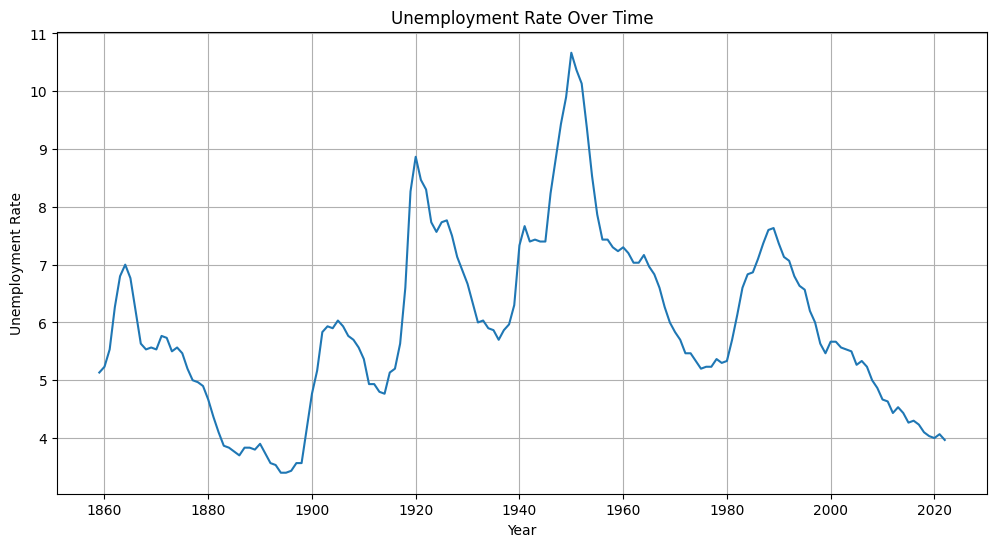

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='year', y='Unemployment')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

The plot reveals **cyclical unemployment spikes** tied to major economic crises: the Great Depression (1930s, peak ~10%), 1980s recession, and post-2008 recovery. Pre-1940, volatility reflects limited policy tools, while post-1940 stability suggests improved countercyclical measures (e.g., New Deal, monetary policy). The long-term downward trend post-1940 hints at structural reforms (unemployment insurance, job training) reducing natural unemployment.  

**Economic insight**: Unemployment mirrors business cycles, with crises causing prolonged job losses.

**Policy insight**: Proactive fiscal/monetary interventions (e.g., stimulus during recessions) and structural policies (labor market reforms) are critical to dampen volatility and lower baseline unemployment, balancing short-term stabilization with long-term resilience.

### **Multiple Line Charts**

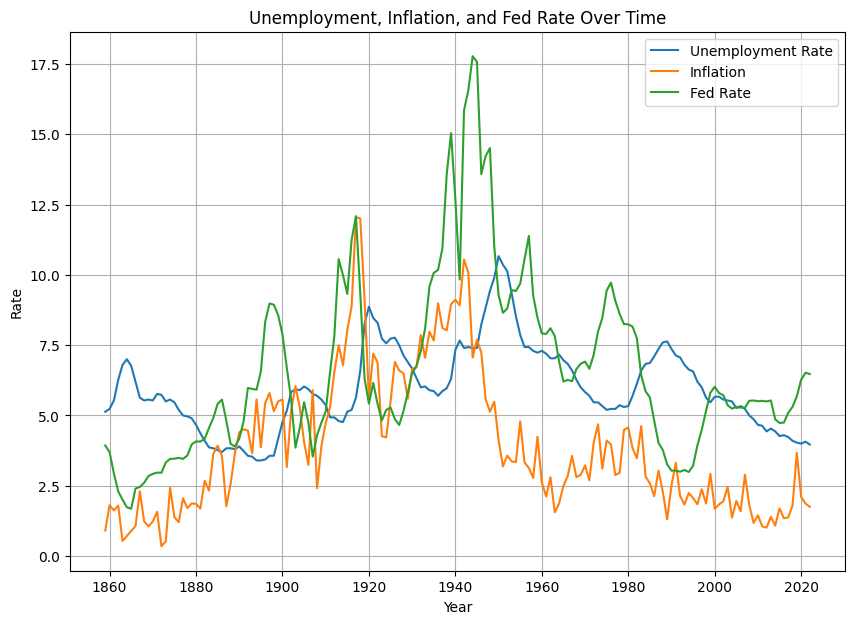

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.lineplot(data=df2, x='year', y='Unemployment', label='Unemployment Rate')
sns.lineplot(data=df2, x='year', y='Inflation', label='Inflation')
sns.lineplot(data=df2, x='year', y='FedRate', label='Fed Rate')

plt.title('Unemployment, Inflation, and Fed Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.grid(True)
plt.legend()
plt.show()

### **Scatter Plot**

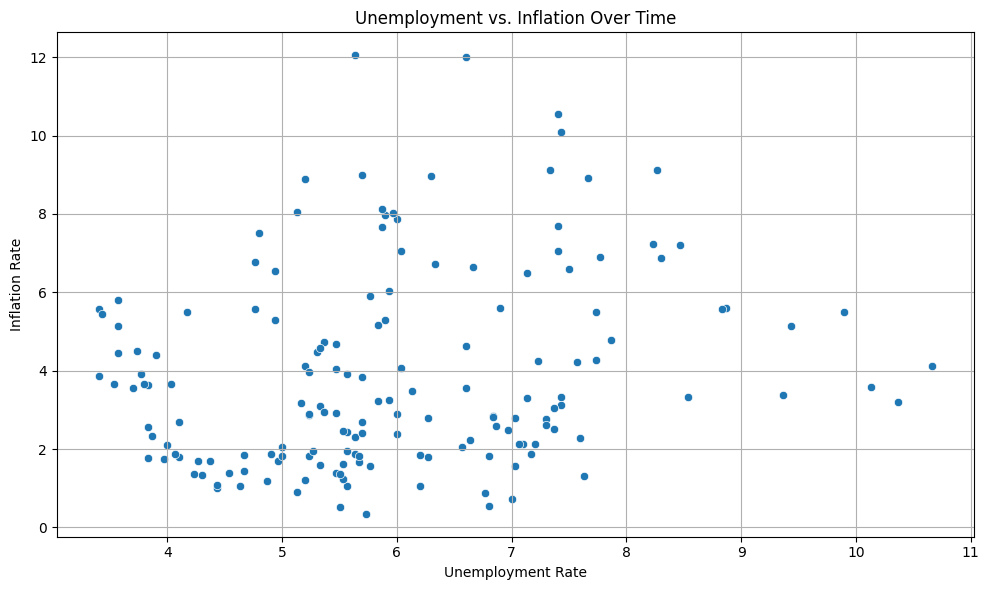

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Unemployment', y='Inflation')
plt.title('Unemployment vs. Inflation Over Time')
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Add the  Line of Best Fit to the Plot**

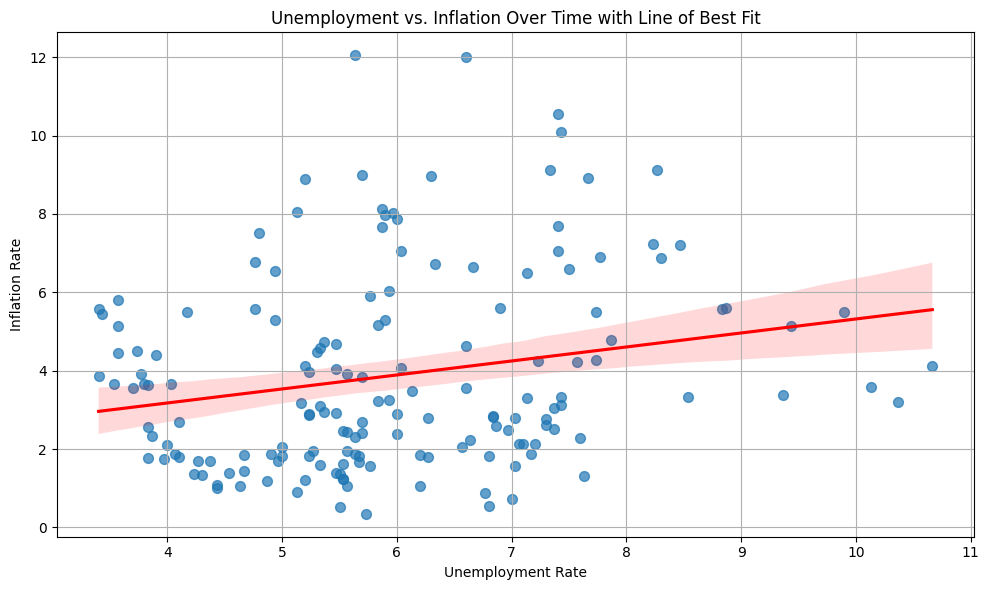

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(data=df2, x='Unemployment', y='Inflation', scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Unemployment vs. Inflation Over Time with Line of Best Fit')
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot reveals a **positive correlation** between unemployment and inflation (0.22), with the best-fit line trending upward—contradicting the traditional Phillips curve’s inverse relationship. Most data clusters at 4–8% unemployment and 2–6% inflation, but the upward slope indicates **stagflation**, where both metrics rise simultaneously, likely due to supply shocks or external disruptions. This complicates policy: raising interest rates to curb inflation may worsen unemployment, while stimulus risks exacerbating price pressures. The wide confidence interval underscores economic volatility, highlighting the challenge of balancing stabilization efforts in such environments.

### **Pairplot**

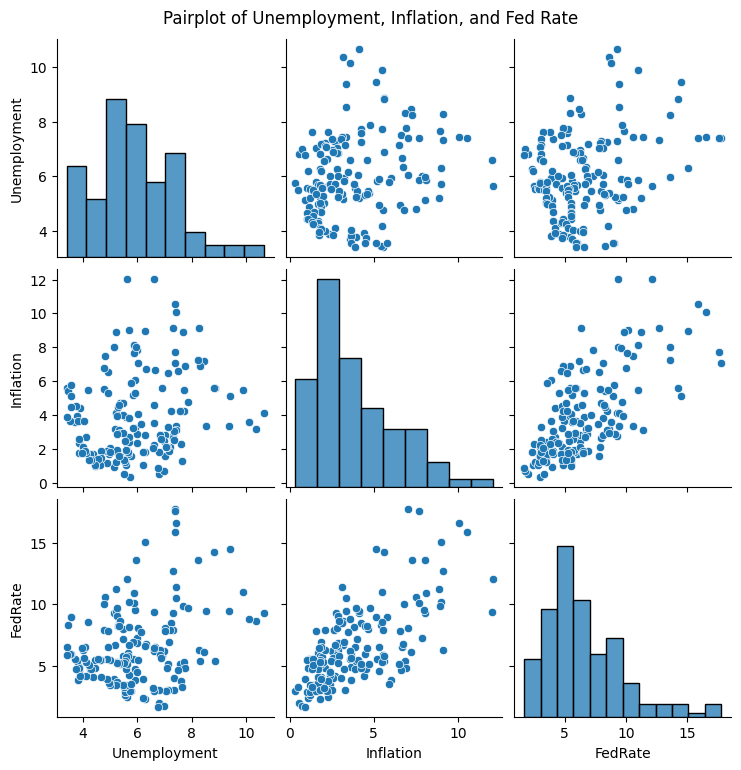

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the three variables for the pairplot
variables_for_pairplot = ['Unemployment', 'Inflation', 'FedRate']

# Create the pairplot
sns.pairplot(df2[variables_for_pairplot])
plt.suptitle('Pairplot of Unemployment, Inflation, and Fed Rate', y=1.02) # Adjust suptitle position
plt.show()

The pairplot shows Unemployment peaks at 4–6% (right-skewed), Inflation clusters below 4%, and FedRate centers at 5–10%. Scatter plots reveal weak positive correlations between Unemployment-Inflation (0.22) and Unemployment-FedRate (0.29), while Inflation-FedRate exhibits a strong positive link (0.67). This suggests stagflation—rising unemployment alongside inflation—contradicting the traditional Phillips curve. The Fed’s rate hikes align closely with inflation control but may inadvertently worsen unemployment, highlighting the challenge of balancing monetary policy to stabilize both price levels and job markets without exacerbating either issue.

### **Correlation Heatmap**

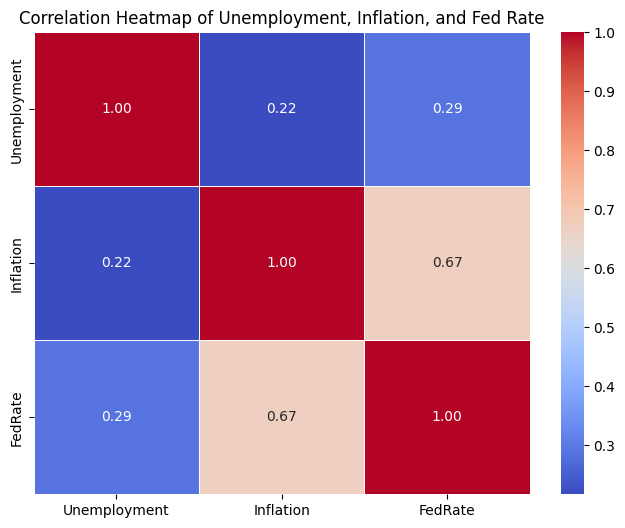

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the variables for correlation analysis
variables_for_correlation = ['Unemployment', 'Inflation', 'FedRate']

# Calculate the correlation matrix
correlation_matrix = df2[variables_for_correlation].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Unemployment, Inflation, and Fed Rate')
plt.show()

The heatmap shows weak positive correlations between Unemployment and Inflation (0.22) and Unemployment and Fed Rate (0.29), while Inflation and Fed Rate exhibit a strong positive correlation (0.67). This suggests the Federal Reserve actively raises rates to combat inflation, aligning with conventional monetary policy. The unusual positive Unemployment-Inflation relationship hints at stagflation, where both metrics rise simultaneously—a deviation from the traditional Phillips curve. The moderate Unemployment-Fed Rate link implies rate hikes may inadvertently strain job markets, underscoring the delicate balance policymakers face in addressing inflation without exacerbating unemployment.

### **Histogram to Show the Distribution of Observations**

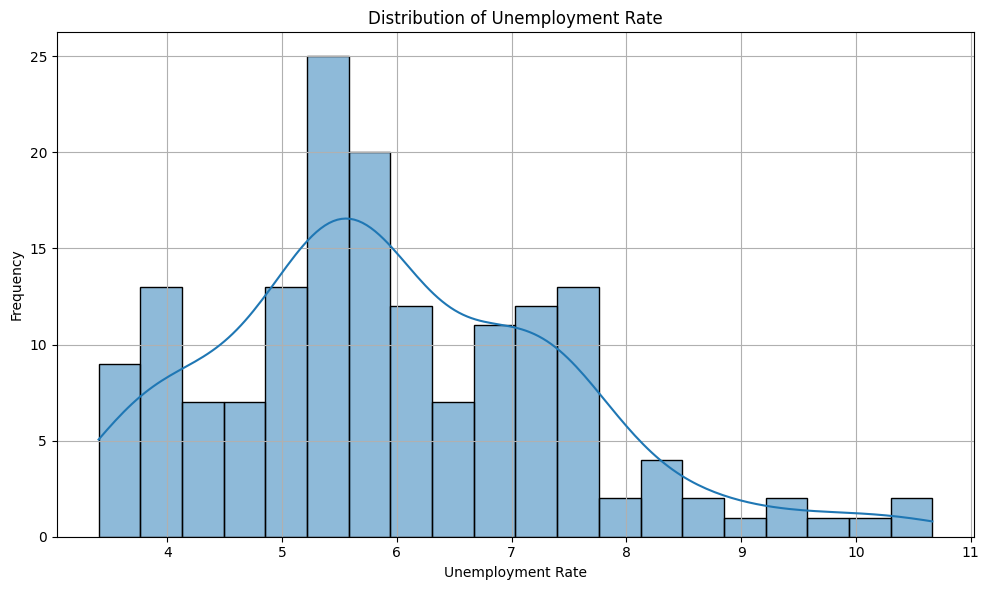

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Unemployment', kde=True, bins = 20)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

The unemployment rate distribution is right-skewed, peaking at 5-6% with most regions (4-7%) showing moderate rates. A long tail extends to 11%, where a small cluster faces severe unemployment. This indicates significant regional disparities, possibly due to localized economic shocks or structural issues. The skewness highlights uneven labor market health, suggesting that while most areas are stable, targeted interventions are needed in high-unemployment regions to address underlying causes like industry decline or skill mismatches.

### **Histogram of Income - GSSSubset**

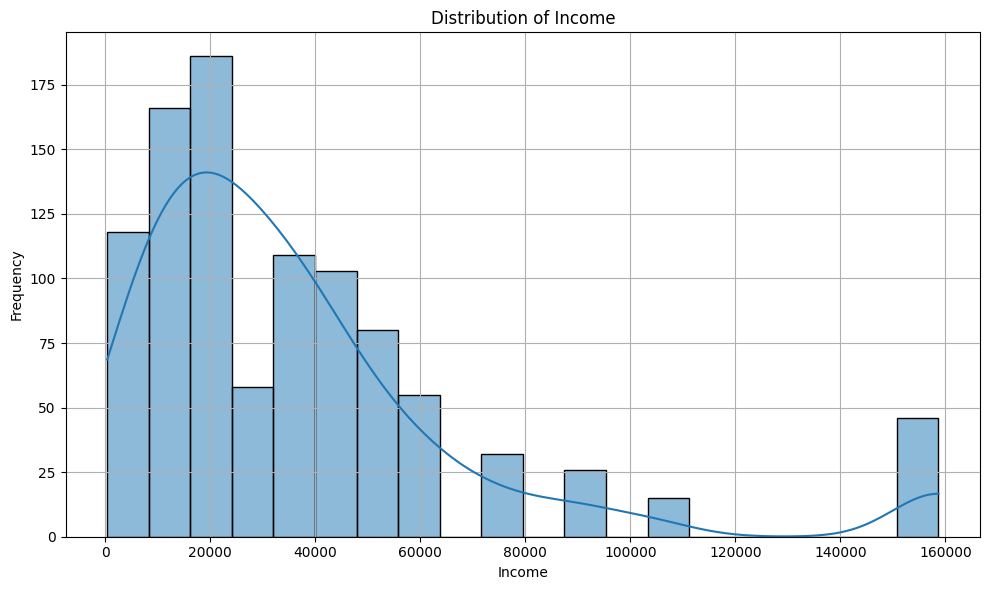

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df4, x='income', kde=True, bins = 20)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

The histogram depicts a right-skewed income distribution, with the majority of individuals earning between 0–40k, peaking near 20k. A long tail extends toward higher incomes (up to 160k), indicating a small segment earns significantly more. The blue curve reinforces this skewness, highlighting income inequality: most people cluster in lower brackets, while a minority occupy high-earning tiers. This pattern reflects common economic disparities, where wealth concentration among fewer individuals can influence policy decisions on taxation and social welfare.